<h2>GROUP MEMBERS FOR DESISNG AND ANALYSIS OF ALGORITHMS</h2>
<h4>NAJJUMA TEOPISTA B24271 S23B23/041</h4>
<h4> LAKICA LETICIA M23B23/023</h4>
<h4> MUKAMA JOSEPH  B24267 S23B23/036</h4>

Performance Summary:
Bubble Sort: Average Time = 0.000188 seconds
Insertion Sort: Average Time = 0.000081 seconds
Selection Sort: Average Time = 0.000115 seconds
Merge Sort: Average Time = 0.000094 seconds
Quick Sort: Average Time = 0.000058 seconds
Heap Sort: Average Time = 0.000115 seconds


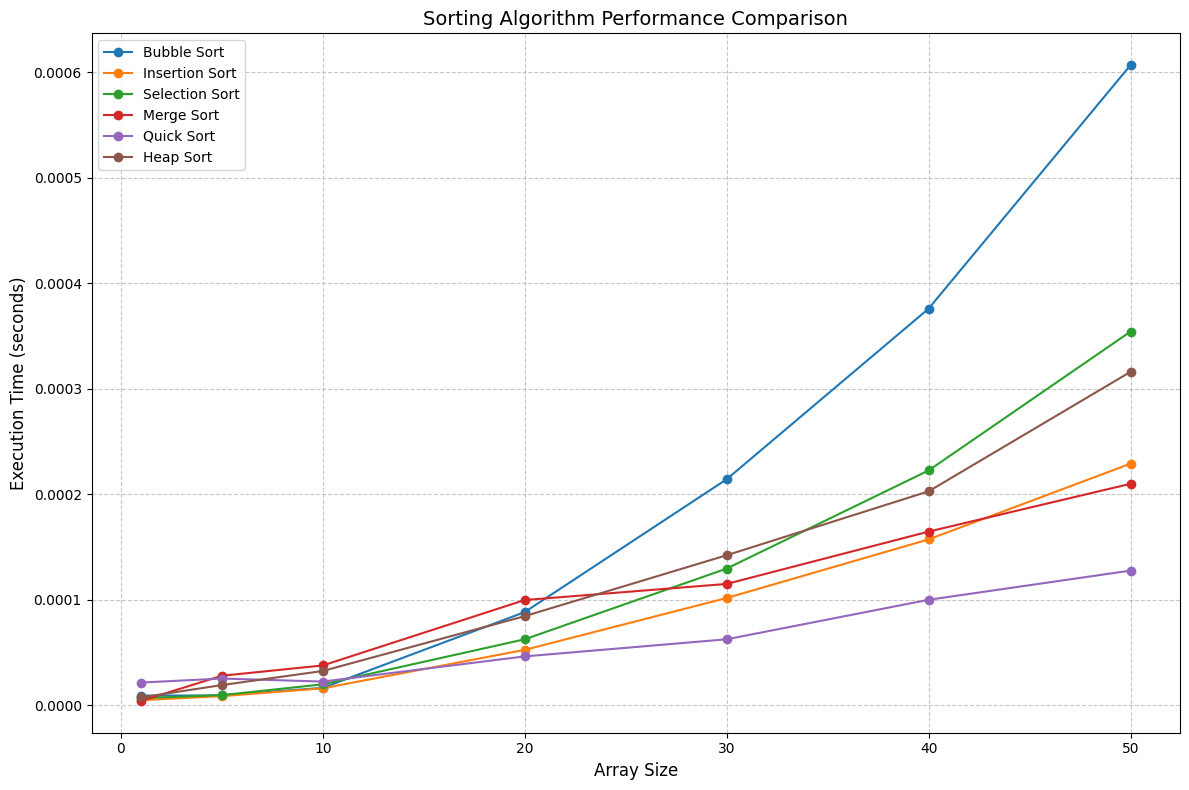

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])
    return result

def quick_sort(arr):
    if len(arr) <= 1:
        return arr

    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    return quick_sort(left) + middle + quick_sort(right)

def heap_sort(arr):
    def heapify(arr, n, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2

        if left < n and arr[left] > arr[largest]:
            largest = left

        if right < n and arr[right] > arr[largest]:
            largest = right

        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)

    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        heapify(arr, i, 0)

    return arr

def compare_sorting_algorithms():
    # Sorting algorithms to compare
    sorting_algorithms = [
        {"name": "Bubble Sort", "func": bubble_sort},
        {"name": "Insertion Sort", "func": insertion_sort},
        {"name": "Selection Sort", "func": selection_sort},
        {"name": "Merge Sort", "func": merge_sort},
        {"name": "Quick Sort", "func": quick_sort},
        {"name": "Heap Sort", "func": heap_sort}
    ]

    # Prepare plot
    plt.figure(figsize=(12, 8))

    # Array sizes to test
    array_sizes = [1, 5, 10, 20, 30, 40, 50]

    # Store performance data
    performance_data = {}

    # Measure sorting time for each algorithm
    for algorithm in sorting_algorithms:
        times = []

        for size in array_sizes:
            # Create random array
            arr = np.random.randint(1, 10000, size=size)

            # Measure sorting time
            start = time.time()
            algorithm['func'](arr.copy())
            end = time.time()

            # Store execution time
            times.append(end - start)

        # Store performance for this algorithm
        performance_data[algorithm['name']] = times

        # Plot the results
        plt.plot(array_sizes, times, label=algorithm['name'], marker='o')

    # Customize the plot
    plt.xlabel('Array Size', fontsize=12)
    plt.ylabel('Execution Time (seconds)', fontsize=12)
    plt.title('Sorting Algorithm Performance Comparison', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='upper left')
    plt.tight_layout()

    # Print performance summary
    print("Performance Summary:")
    for name, times in performance_data.items():
        avg_time = np.mean(times)
        print(f"{name}: Average Time = {avg_time:.6f} seconds")

    # Show the plot
    plt.show()

# Run the comparison
if __name__ == "__main__":
    compare_sorting_algorithms()